$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Classification**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

# Theoretical problems

## [Naive Bayes Classifier, 6 points]

A psychologist does a small survey on ''happiness''. Each respondent provides a vector with entries 1 or 0 corresponding to if they answered “yes” or “no” to a question respectively. The question vector has attributes 
$$
x = (\mbox{rich, married, healthy}) \tag{1}
$$

Thus a response $(1, 0, 1)$ would indicate that the respondent was
''rich'', ''unmarried'' and ''healthy''. In addition, each respondent
gives a value $c = 1$ if they are content wih their life and $c = 0$
if they’re not. The following responses were obtained.

$$
c = 1: (1, 1, 1),(0, 0, 1),(1, 1, 0),(1, 0, 1) \\
c = 0: (0, 0, 0),(1, 0, 0),(0, 0, 1),(0, 1, 0)
$$

1. Using naive Bayes, what is the probability that a person is ''not rich'', ''married'' and ''healthy'' is ''content''?

2. What is the probability that a person who is ''not rich'' and ''married'' is content ? (i.e. we do not know if they are ''healthy'')

## [Extending Naive Bayes, 4 points]

Consider now, the following vector of attributes:

* $x_1 = 1$ if customer is younger than 20 and 0 otherwise.
* $x_2 = 1$ if customer is between 20 and 30 in age, and 0 otherwise.
* $x_3 = 1$ if customer is older than 30 and 0 otherwise
* $x_4 = 1$ if customer walks to work and 0 otherwise.

Each vector of attributes has a label ''rich'' or ''poor''. Point out potential difficulties with your approach above to training using naive Bayes. Suggest and describe how to extend your naive Bayes method to this dataset.


# Solutions to the theoretical problems
## Naive Bayes Classifier
To run the naive bayes classifier we first make some assumptions. These are 
* The probability of a point being in a specific class is the same for all classes (1/K(the number of classes))
* The three attributes for all data points are independant of each other, i.e. the probability of being rich is not dependant on being married

The general formula for the naive bayes classifier (i.e. a point being in a specific class) is as follows: 

$p(t_{new} = k | x_{new},X,t) = \frac{p(x_{new} | t_{new} = k,X,t)*p(t_{new} = k)}{\sum_{j} p(x_{new} | t_{new} = j,X,t)*p(t_{new} =j)} $

We by the assumptions assume that $p(t_{new} = k)$ and $p(t_{new} = j)$ are the same: $\frac{1}{K}$ = $\frac{1}{2}$

So for a given new point we want to calculate $p(x_{new} | t_{new} = k,X,t)$. We do this by calculating the probability of each atribute being either 0 or 1, depending on the task, I.e. the probability of the first attribute being 1 equals the number of data points in the training data in the given class having the first parameter set to 1, divided by the total training data in that class. 

We also want to calculate $\sum_{j} p(x_{new} | t_{new} = j,X,t)*p(t_{new} =j)$ we do this by calculating the probability of the point being in the first class, plus the probability of the point being in the second class (by the computations mentioned above) and multiplying with the probabilities of being in the two classes. 

### 1 
We wish to calculate $p(t_{new} = 1 | (0,1,1), X,t)$. So by the computations mentioned above we get:

$p((0,1,1) | t_{new} = 1,X,t)$ = $\frac{1}{4} * \frac{2}{4} * \frac{3}{4} = \frac{1}{8}$

$\sum_{j} p((0,1,1) | t_{new} = j,X,t)*p(t_{new} =j)$ = $((\frac{3}{4} * \frac{1}{4} * \frac{1}{4} = \frac{3}{64}) + \frac{1}{8}) * \frac{1}{2} = \frac{11}{128}$

We then use bayes classifier to get:
$p(t_{new} = 1 | (0,1,1), X,t) = \frac{\frac{1}{8} * \frac{1}{2}}{\frac{11}{128}} = \frac{128}{176} = \frac{8}{11}$

### 2
We are here missing a data point, we could assume that the probability of the person being healthy is $\frac{1}{2}$, but that does not reflect the training data very well. As such, we choose to ignore the final attribute and calculate the probability for the person being content given "not rich" and "married". By the same computations as in subtask 1 we get. 

$p(t_{new} = 1 | (0,1), X,t) = \frac{\frac{3}{8} * \frac{1}{2}}{\frac{7}{32}} = \frac{96}{112} = \frac{6}{7}$

As such we get a higher probability for the person being content, but that is somewhat self-explanatory given that we ignore one potential aspect of contenteness. 

## Extending Naive Bayes
The problems we notice are that we assume that the parameters are independant in our naive bayes approach, here they clearly are not as a person can only belong to one age group at a time, i.e. having a one in one of the three first attributes means having a zero in the others. Further, we also assume that the probability of being in one of the two classes are equal, which is not the case here as only a small percentage of the population are considered rich (assuming "rich" is referring to money). Further, the method does in itself (as it does not explain the context) take into account that people might be unemployed (thus not being able to walk to work), or studying. 

As such, to extend our approach, we need to calculate $p(x_{new} | t_{new} = k,X,t)$ by only calculating the percentage of persons belonging to one age group at a time. So instead of running the naive bayes approach on the entire dataset, we split it into three different experiments, based on the age group and run one experiment per age group, i.e. one experiment could have the labels rich/poor, and the attributes (under 20?, walk to work?). Then we somwhat compensate for the dependance of the age groups. 

Further we could instead of having the probability for the label = 0.5 using a official source for the percentage of the population being rich.  



# Practical problems

## [Bayes classifier, 5 points]

Dowload the dataset **"dataset2.txt"**. You can use the following code for example:
```python
from numpy import genfromtxt
data = genfromtxt('dataset2.txt', delimiter=',')
labels = data[:,-1]
```
The dataset contains $3$-dimensional data, $X$, generated from $2$ classes with labels, $y$ either $+1$ or $-1$.  Each row of $X$ and $y$ contain one observation and one label respectively.  There are $1000$ instances of each class. 

a. Assume that the class conditional density is spherical Gaussian, and both classes have equal prior. Write the expression for the Bayes (<span style="color:red"> not **naive Bayes**</span>) classifier i.e. derive
$$
P(y_{new} = -1 | x_{new} , X, y ) \\
P(y_{new} = +1 | x_{new} , X, y ) ~.
$$

It is useful to note that the dependence on training data $X, y$ for class $1$ can be expressed as: 

$$ 
P( x_{new} | y_{new} = 1, X, y) = P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1})
$$

where $\hat{\mu}_{1} \in \mathbb{R}^3$ and $\hat{\sigma}^{2}_{1}\in \mathbb{R}$ are MLE estimates for mean (3-dimensional) and variance based on training data with label $+1$ (and similarly for class 2 with label $-1$). 

b. Implement a function **sph_bayes()** which computes the probability of a new test point *Xtest* coming from class $1$ ($P1$) and class $2$ ($P2$). Finally, assign a label *Ytest* to the test point based on the probabilities $P1$ and $P2$.

```python
def sph_bayes(Xtest, ...): # other parameters needed.

    return [P1, P2, Ytest]
```
c. Write a function **new_classifier()**

```python
def new_classifier(Xtest, mu1, mu2)
    
    return [Ytest]
```
which implements the following classifier,
$$
f(x) = \mbox{sign}\left(\frac{(\mu_1 - \mu_2)^\top (x - b) }{\|\mu_1 -  \mu_2\|_2} \right)
$$
with $b = \frac{1}{2}(\mu_1 + \mu_2)$.

d. Report 5-fold cross validation error for both classifiers.

## [DIGITS dataset classifer, 5 points]

Load the DIGITS dataset:
```python
from sklearn import datasets
digits = datasets.load_digits()
```
This dataset contains $1797$ samples of ten handwritten digit classes. You can further query and visualize the dataset using the various attributes of the returned dictionary:
```python
data = digits.data
print(data.shape)
target_names = digits.target_names
print (target_names)
import matplotlib.pyplot as plt
y = digits.target
plt.matshow(digits.images[0])
plt.show()
```

a. Use **new_classifier()** designed previously to do binary classification between classes representing digits "*5*" and "*8*".

b. Investigate an alternative feature function as described below:

1. Scale each pixel value to range $[0, 1] $ from original gray-scale ($0-255$). 
2. Compute variance of each row and column of the image. This will give you a new feature vector of size $16$ i.e. 

$$ 
x' = \left[ \; Var(row_1)  , Var(row_2), \ldots , Var(row_{8}), Var(col_1), \ldots, Var(col_{8}) \;\right]^T
$$

c. Report $5$-fold cross validation results for parts $(a)$ and
$(b)$ in a single table. What can you say about the results?

# Solutions to the practical problems
## Bayes classifier
### a) 
We want to write the expression for the bayes classifier on this training data set. The general form of the classifiers are as follows: 

$p(T_{new}=k|X,t,x_{new}) = \frac{p(x_{new}|T_{new}=k,X,t)p(T_{new} = k,X,t)}{\sum_{j}p(x_{new}|t_{new}=j,X,t)p(T_{new}=j,X,t)}$

We want to select the prior: $p(T_{new} = k,X,t)$ and the likleyhood: $p(x_{new}|T_{new}=k,X,t)$. 

We will select a class sized prior: $p(T_{new} = k,X,t) = \frac{N_C}{N}$, i.e. the number of objects in the training data belonging to class/label C divided by the total number of points in the training data. For the likelihood we are given that $p(x_{new}|T_{new}=k,X,t) = p(x_{new}|\hat{\mu_c},\hat{\sigma^2_c})$ i.e. $E[X]$ in the distribution for the element corresponding to that class from the training data.

Thus, for the two classes we get:

$p(T_{new}=1|X,t,x_{new}) = \frac{p(x_{new}|\hat{\mu_1},\hat{\sigma^2_1})*\frac{N_1}{N}}{\sum_j p(x_{new}|\hat{\mu_j}\hat{\sigma^2_j})*\frac{N_j}{N}}$

$p(T_{new}=-1|X,t,x_{new}) = \frac{p(x_{new}|\hat{\mu_{-1}},\hat{\sigma^2_{-1}})*\frac{N_-{1}}{N}}{\sum_j p(x_{new}|\hat{\mu_j}\hat{\sigma^2_j})*\frac{N_j}{N}}$

In [18]:
from numpy import genfromtxt
import numpy as np
data = genfromtxt('dataset2.txt', delimiter=',')
labels = data[:,-1]


#b)
def sph_bayes(Xtest,data): # other parameters needed.
    trainingDataLength = data.size
    c1, c2 = splitDataIntoClasses(data,1,-1)
    likelihood1 = np.mean(c1)
    likelihood2 = np.mean(c2)
    prior1 = (c1.size/trainingDataLength)
    prior2 = (c2.size/trainingDataLength)
    
    P1 = (likelihood1*prior1)/((likelihood1*prior1)+(likelihood2*prior2))
    P2 = (likelihood2*prior2)/((likelihood1*prior1)+(likelihood2*prior2))
    Ytest = -1
    
    if(P1>=P2):
        Ytest = 1
    
    
    
    
    return [P1, P2, Ytest]




def splitDataIntoClasses(data,label1,label2): 
    class1Data = []
    classSub1Data = []
    
    for i in data: 
        if i[3] == label1:
            class1Data.append(np.delete(i,3))
        elif i[3] == label2:
            classSub1Data.append(np.delete(i,3))
    return np.array(class1Data), np.array(classSub1Data)


#c)
def new_classifier(Xtest, mu1, mu2):
    b = np.divide(np.add(mu1 + mu2),2)
    Ytest = np.sign((np.subtract(mu1,mu2).T*np.subtract(Xtest.b))/np.absolute(mu1-mu2))
    return [Ytest]



p1,p2,c1 = sph_bayes(np.array([1.2,3.2,4.4,1]),data);
print(p1)
print(p2)
print(c1)


0.9965548345034452
0.0034451654965548346
1


## DIGITS dataset classifier


(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


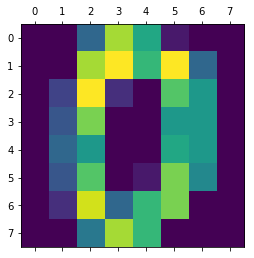

[0 1 2 3 4 5 6 7 8 9]


In [19]:
from sklearn import datasets
digits = datasets.load_digits()

data = digits.data
print(data.shape)
target_names = digits.target_names
print (target_names)
import matplotlib.pyplot as plt
y = digits.target
plt.matshow(digits.images[0])
plt.show()

print(digits(data, target))
